# Part 1

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

In [2]:

data = pd.read_json('logins.json', dtype=True)

data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
## check dtypes

data.dtypes
#convert to datetime
data['login_time'] = data['login_time'].apply(pd.to_datetime)

data.dtypes

login_time    datetime64[ns]
dtype: object

In [4]:
##resample to 15 min intervals
data.index = data['login_time'] ## copy to index for resampling
## other 
data_counts = data['login_time'].resample('15min').count()

##reformat
data_counts = pd.DataFrame(data_counts)
data_counts.columns = ['num_login']
data_counts.reset_index(inplace=True)

data_counts.head()

,login_time,num_login
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [5]:
### how many 15 min have zero log ins? 

data_counts['num_login'].value_counts().sort_values()

### none, but several with only 1 login

num_login
66      1
48      1
73      1
51      1
55      1
     ... 
1     638
5     658
3     703
4     706
2     726
Name: count, Length: 62, dtype: int64

<Axes: xlabel='num_login', ylabel='Count'>

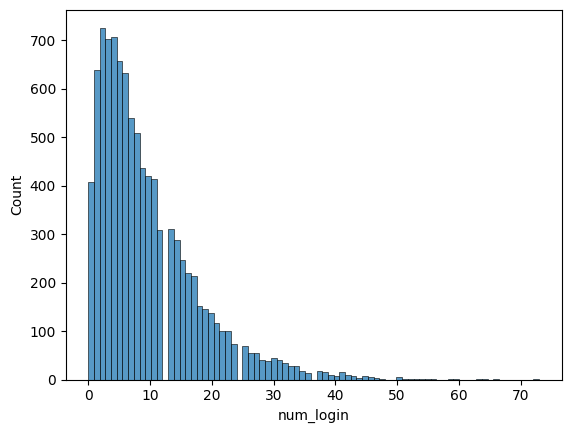

In [6]:
##missing or outliers? 
sns.histplot(data_counts, x='num_login')

##weird gaps at roughly 12, 24, and 36 logins - sorta weird since data is otherwise almost continuos. 
## Something to look out for but not sure I have sufficient data to investigate further. 

(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0.0, 0, '1970-01-01'),
  Text(14.0, 0, '1970-01-15'),
  Text(31.0, 0, '1970-02-01'),
  Text(45.0, 0, '1970-02-15'),
  Text(59.0, 0, '1970-03-01'),
  Text(73.0, 0, '1970-03-15'),
  Text(90.0, 0, '1970-04-01'),
  Text(104.0, 0, '1970-04-15')])

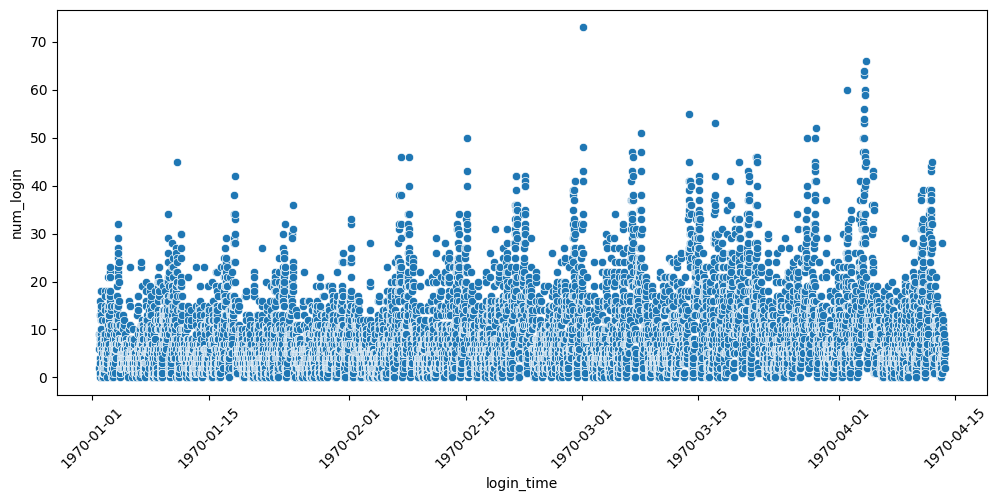

In [7]:
### visualize count data
f, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.scatterplot(data_counts, x='login_time', y='num_login')
plt.xticks(rotation=45)
## roughly weekly peak of logins... what day of the week? 

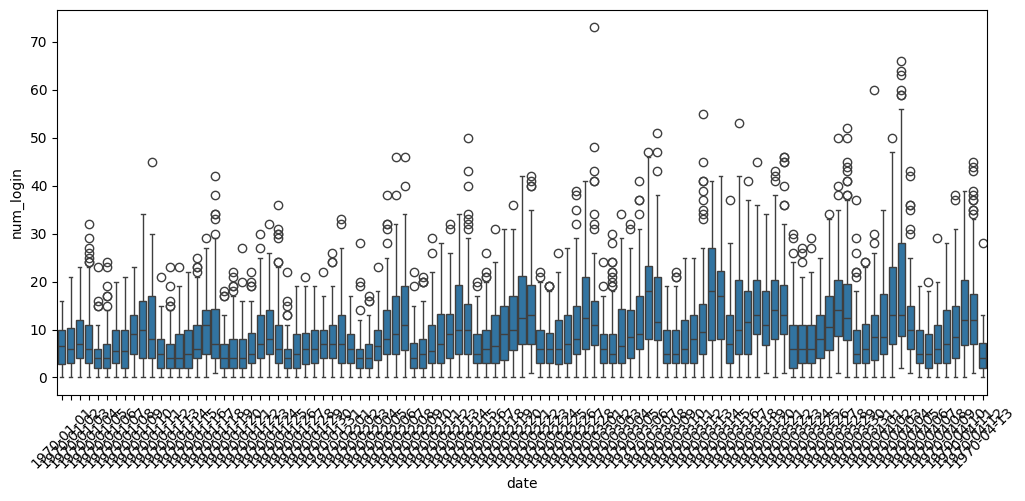

In [8]:
## day of the month? 
f, ax = plt.subplots(1, 1, figsize=(12, 5))
data_counts['date'] = data_counts['login_time'].dt.date
sns.boxplot(data=data_counts, x='date', y='num_login', ax=ax)
plt.xticks(rotation=45)
plt.show()
 ### similar trend to scatter plot

<Axes: xlabel='day_week', ylabel='num_login'>

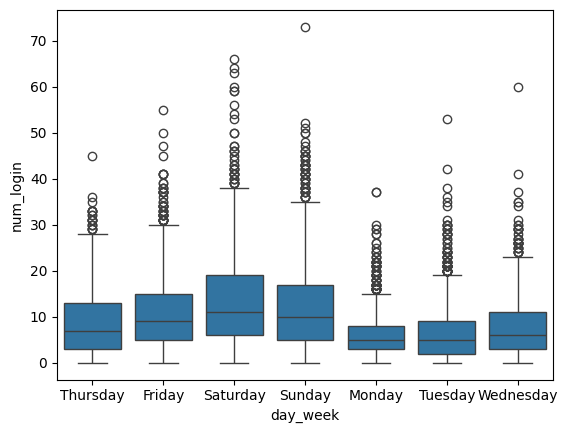

In [9]:
## is there a day of week bias? 
data_counts['day_week'] = data_counts['login_time'].dt.day_name()

sns.boxplot(data=data_counts, x='day_week', y='num_login')
## A: more logins on the weekend

<Axes: xlabel='hour', ylabel='num_login'>

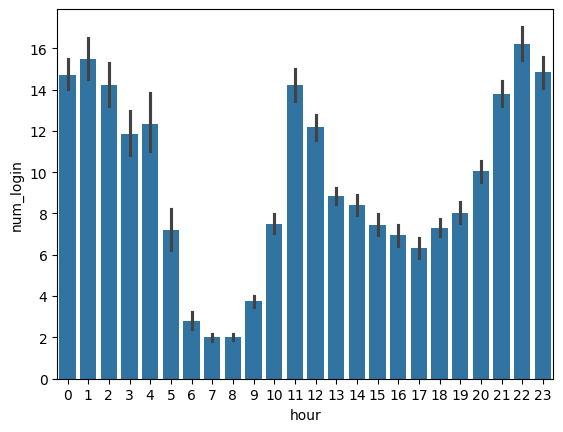

In [10]:
## time of day?
data_counts['hour'] = data_counts['login_time'].dt.hour
sns.barplot(data=data_counts, x='hour', y='num_login')
 ### more logins at lunch, and in the late evening and overnight

<Axes: xlabel='hour', ylabel='num_login'>

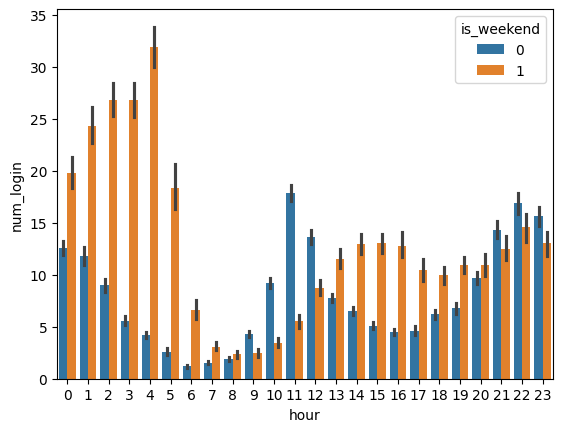

In [11]:
## Q: does daily cycle change for weekend/weekday? 

data_counts['is_weekend'] = 0
data_counts.loc[data_counts['day_week'].isin(['Saturday', 'Sunday']), 'is_weekend'] = 1
sns.barplot(data=data_counts, x='hour', y='num_login', hue='is_weekend')
 ### weekend afternoons generally drive afternoon logins, while lunchtime logins primarily occur during the week.
## weekend is just classified as Sat/Sun, might get slightly clearer trends if weekend was defined as fri evening to sunday evening. 

## Part 1 Summary

1. weekly login peaks on weekends
2. daily patterns of weekday/weekend logins align with leasure time. eg lunch during week, afternoons on weekends.
3. lots of weekend log in during early hours
4. No apparent missing data, but one odd signal, no 15 min intervals with ~12, 24, or 36 logins. 

# Part 2

### Question 1: 
Assuming all the data is available, I would use whichever metric demonstrates the primary differences in circadian rhythm between the two cities as the target variable. A key measure of success is when the circadian rhythms have the same population statistics within an appropriate sampling error. If circadian rhythms from each city have the same population statistics, then one can assume the literal populations from the two cities have mixed properly. However, it's possible that some threshold of the populations becoming more similar by a specific percentage may meet the city managers goals. I would be sure to understand what they consider success prior to completing the analysis.  

### Questions 2: 
Let's assume that the measure of circadian rhythm in each city is some sort of traffic dataset like number of cars on the road and not parked within the city limits and let's assume that the historical data is avaialble and it's easy to continue to collect after the bridge toll reimbursement experiement. 

First, I would examine the historical drive data for each city. Do they follow a specific distribution? The same distribution? If so, what are the key distribution statistics (e.g. mean, median, standard deviation, etc.). 

Second, I would calculate the same metrics for each city after the bridge toll experiement. Here, I am assuming that both pre- and post-datasets are subsamples of the entire population. I am also assuming that the post-experiment dataset is sufficiently large to be able to compare with the historical dataset and to calculate margins of error using random subsampling. 

I would first start with plotting the distributions of the dataset. They are visually similar, I would start with a two-sample t-test and to check for the same population mean. I would also calculate the K-S test to see if the two samples are from the same population. Margins of error (t test condifence interval, boostrapping, etc) would be used to confirm whether the population statistics are similar enough. If the traffic data for both cities are from the same population, or have the same population statsitics, that means that the literal populations from the two cities have mixed enough to become one functional population and the key metric from the experiement would be a success. 

Potential caveats for this analysis could include: 
1. We assume the method for collecting the circadian rhythm dataset is representative of the whole population.
2. We assume they are willing to continue to reimburse bridge tolls until we have enough data to complete our analysis.

# Part 3

In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

In [13]:
## Load data
data_u = pd.read_json('Ultimate_Data_Challenge.json', dtype=True)

data_u.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


### EDA

#### Outline
- Check for missing values, outliers, plot all the data, check for correlation

In [14]:
#check dtypes
data_u.dtypes

## convert date columns to datetime
data_u[['signup_date', 'last_trip_date']] = data_u[['signup_date', 'last_trip_date']].apply(pd.to_datetime)

data_u.dtypes


city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [15]:
### check for null values
data_u.isna().sum()
### null values in avg driver rating, phone type, and avg rider rating


city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [16]:
## percent missing data for each city

print(data_u.loc[data_u['avg_rating_of_driver'].isna(), 'city'].value_counts() / (data_u['city'].value_counts()) * 100)
# 
print(data_u.loc[data_u['phone'].isna(), 'city'].value_counts() / (data_u['city'].value_counts()) * 100)
print(data_u.loc[data_u['avg_rating_by_driver'].isna(), 'city'].value_counts() / (data_u['city'].value_counts()) * 100)


## about the same percentage for each city. Very few missings for phone and rating by driver. 

# don't drop avg_rating_of_driver as those records are ~15% of data. Instead replace missing with -999 
# (should be fine for randomforest which is categorical
print(data_u['avg_rating_of_driver'].unique())
data_u['avg_rating_of_driver'] = data_u['avg_rating_of_driver'].replace(np.nan, -999)
print(data_u['avg_rating_of_driver'].unique())
#drop missing values

data_u.dropna(inplace=True, subset=['phone', 'avg_rating_by_driver'])

print(data_u.isna().sum())
print('still ', len(data_u), 'records left')

city
Winterfell        16.935207
Astapor           17.460989
King's Landing    12.665350
Name: count, dtype: float64
city
Winterfell        0.904182
Astapor           0.731825
King's Landing    0.631787
Name: count, dtype: float64
city
Winterfell        0.441378
Astapor           0.350792
King's Landing    0.394867
Name: count, dtype: float64
[4.7 5.  4.3 4.6 4.4 3.5 nan 4.5 4.  3.9 4.9 4.8 2.5 3.7 1.  4.1 4.2 3.
 3.8 2.  2.7 3.3 2.8 3.6 3.4 3.2 2.6 3.1 2.9 1.7 1.8 1.5 2.3 1.9 2.1 2.4
 1.6 2.2]
[   4.7    5.     4.3    4.6    4.4    3.5 -999.     4.5    4.     3.9
    4.9    4.8    2.5    3.7    1.     4.1    4.2    3.     3.8    2.
    2.7    3.3    2.8    3.6    3.4    3.2    2.6    3.1    2.9    1.7
    1.8    1.5    2.3    1.9    2.1    2.4    1.6    2.2]
city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultima

In [17]:
data_u.describe().T

##check min/max dates are sensible for the problem statement. Other metrics make sense. Ratings appear to be 1-5 scale. 

,count,mean,min,25%,50%,75%,max,std
trips_in_first_30_days,49406.0,2.284176,0.0,0.0,1.0,3.0,125.0,3.799164
signup_date,49406,2014-01-16 12:54:30.210096128,2014-01-01 00:00:00,2014-01-09 00:00:00,2014-01-17 00:00:00,2014-01-24 00:00:00,2014-01-31 00:00:00,NaN
avg_rating_of_driver,49406.0,-157.112915,-999.0,4.0,4.7,5.0,5.0,368.983113
avg_surge,49406.0,1.074617,1.0,1.0,1.0,1.05,8.0,0.221009
last_trip_date,49406,2014-04-19 14:43:44.620491520,2014-01-01 00:00:00,2014-02-15 00:00:00,2014-05-08 00:00:00,2014-06-18 00:00:00,2014-07-01 00:00:00,NaN
surge_pct,49406.0,8.846788,0.0,0.0,0.0,8.7,100.0,19.890166
weekday_pct,49406.0,60.913282,0.0,33.3,66.7,100.0,100.0,37.023166
avg_dist,49406.0,5.783987,0.0,2.42,3.88,6.93,79.69,5.627329
avg_rating_by_driver,49406.0,4.777861,1.0,4.7,5.0,5.0,5.0,0.447114


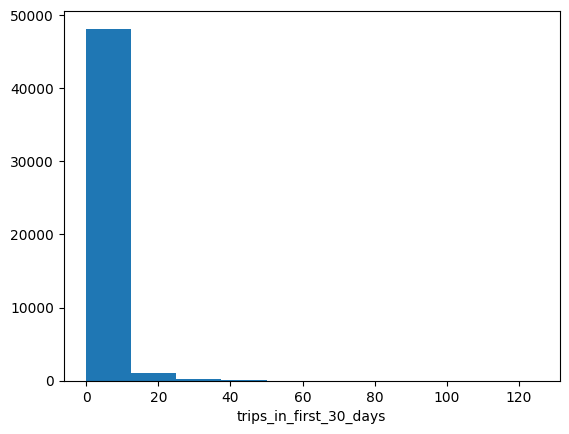

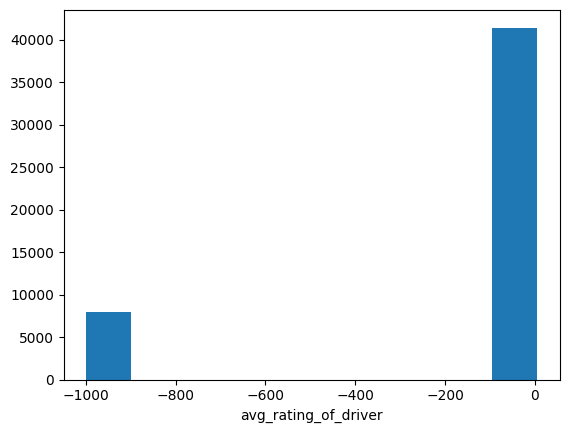

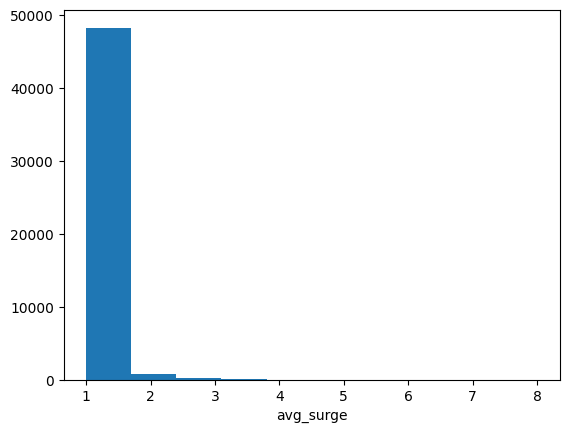

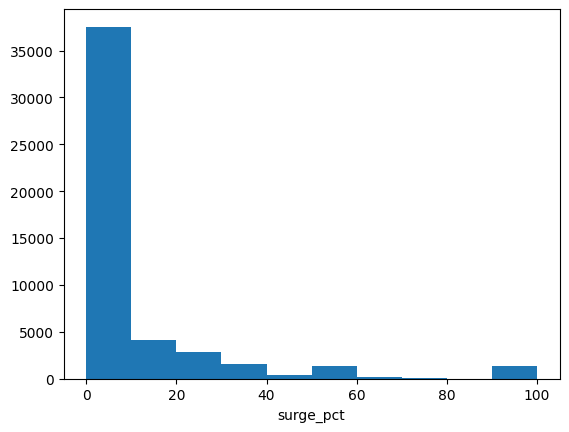

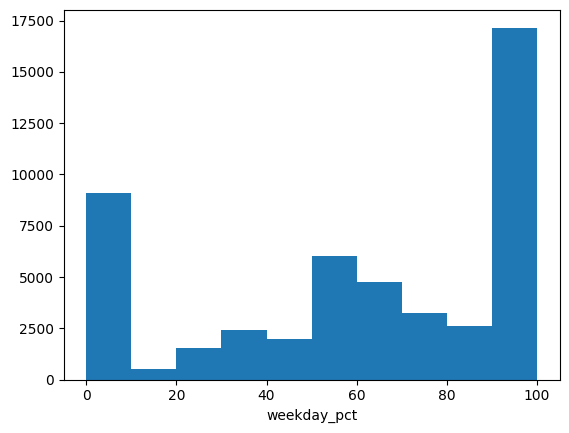

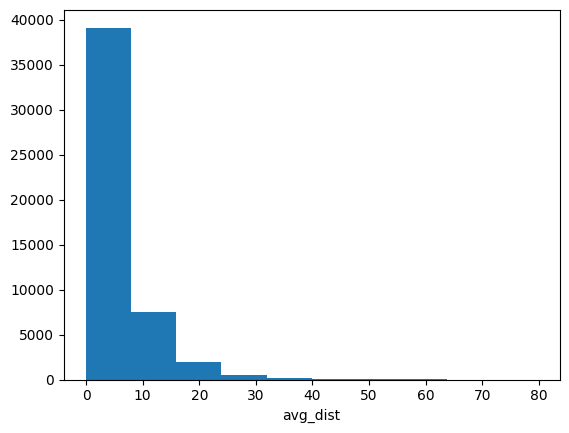

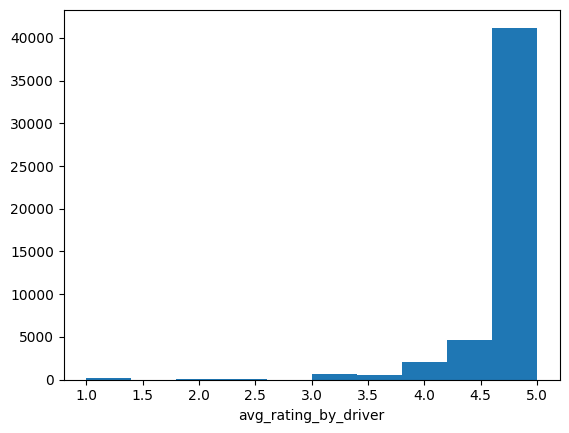

In [18]:
num_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
            'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

for n in num_cols:
    plt.hist(data_u[n])
    plt.xlabel(n)
    plt.show()

## no visible outliers

### Feature Engineering and Correlation

1. First step to calculate categorical feature active_6mo. This will be target variable. 
2. Convert non-numeric features. 
3. Check feature correlation

In [19]:
# which cols are not numeric? 
print(data_u.dtypes)
#city and phone are text, signup_date and last_trip_date are dates


city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object


,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,year_signup,month_signup,day_signup,year_last_trip,month_last_trip,day_last_trip
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,2014,1,25,2014,6,17
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,2014,1,29,2014,5,5
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,2014,1,6,2014,1,7
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,2014,1,10,2014,6,29
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,2014,1,27,2014,3,15


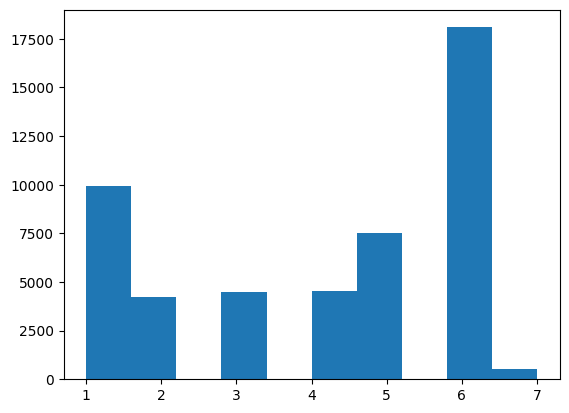

In [20]:
# convert datetime to day, month, year

data_u[['year_signup', 'month_signup', 'day_signup']] = [x.timetuple()[:3] for x in data_u.signup_date]
data_u[['year_last_trip', 'month_last_trip', 'day_last_trip']] = [x.timetuple()[:3] for x in data_u.last_trip_date]

plt.hist(data_u['month_last_trip'])
data_u.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

data_u.head()

In [21]:
#calculate target variable, 1 is last month was after June (six months after signing up)
data_u['active_6mo'] = 0
data_u.loc[data_u['month_last_trip'] >= 6, 'active_6mo'] = 1
data_u.drop(['day_last_trip', 'year_last_trip', 'month_last_trip'], inplace=True, axis=1) #drop last trip date cause it's essentially the target variable

data_u

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,year_signup,month_signup,day_signup,active_6mo
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,2014,1,25,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,2014,1,29,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,2014,1,6,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,2014,1,10,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,2014,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,2014,1,25,1
49996,Astapor,1,-999.0,1.00,iPhone,0.0,False,0.0,0.00,4.0,2014,1,24,0
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,2014,1,31,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,2014,1,14,0


In [22]:
# percent of active_6mo in each class - to check that data isn't too heavily skewed toward one bin, sorta skewed, 
# I'll make sure to check train and test 
print(data_u['active_6mo'].value_counts() / len(data_u) * 100)

active_6mo
0    62.281909
1    37.718091
Name: count, dtype: float64


In [23]:
# check how many unique values for city and phone parameters (only text_based features) 
# to make sure there aren't too many dummy variables. 
print(data_u['city'].value_counts())
print(data_u['phone'].value_counts())

#convert to numeric dummies
cat_columns = ['city', 'phone']
data_u_num = data_u.drop(cat_columns, axis=1)
data_u_num = pd.merge(data_u_num, pd.get_dummies(data_u[cat_columns], dtype='int'), right_index=True, left_index=True)
data_u_num.dtypes
## all int, float, or bool

city
Winterfell        23024
Astapor           16355
King's Landing    10027
Name: count, dtype: int64
phone
iPhone     34446
Android    14960
Name: count, dtype: int64


trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
year_signup                 int64
month_signup                int64
day_signup                  int64
active_6mo                  int64
city_Astapor                int64
city_King's Landing         int64
city_Winterfell             int64
phone_Android               int64
phone_iPhone                int64
dtype: object

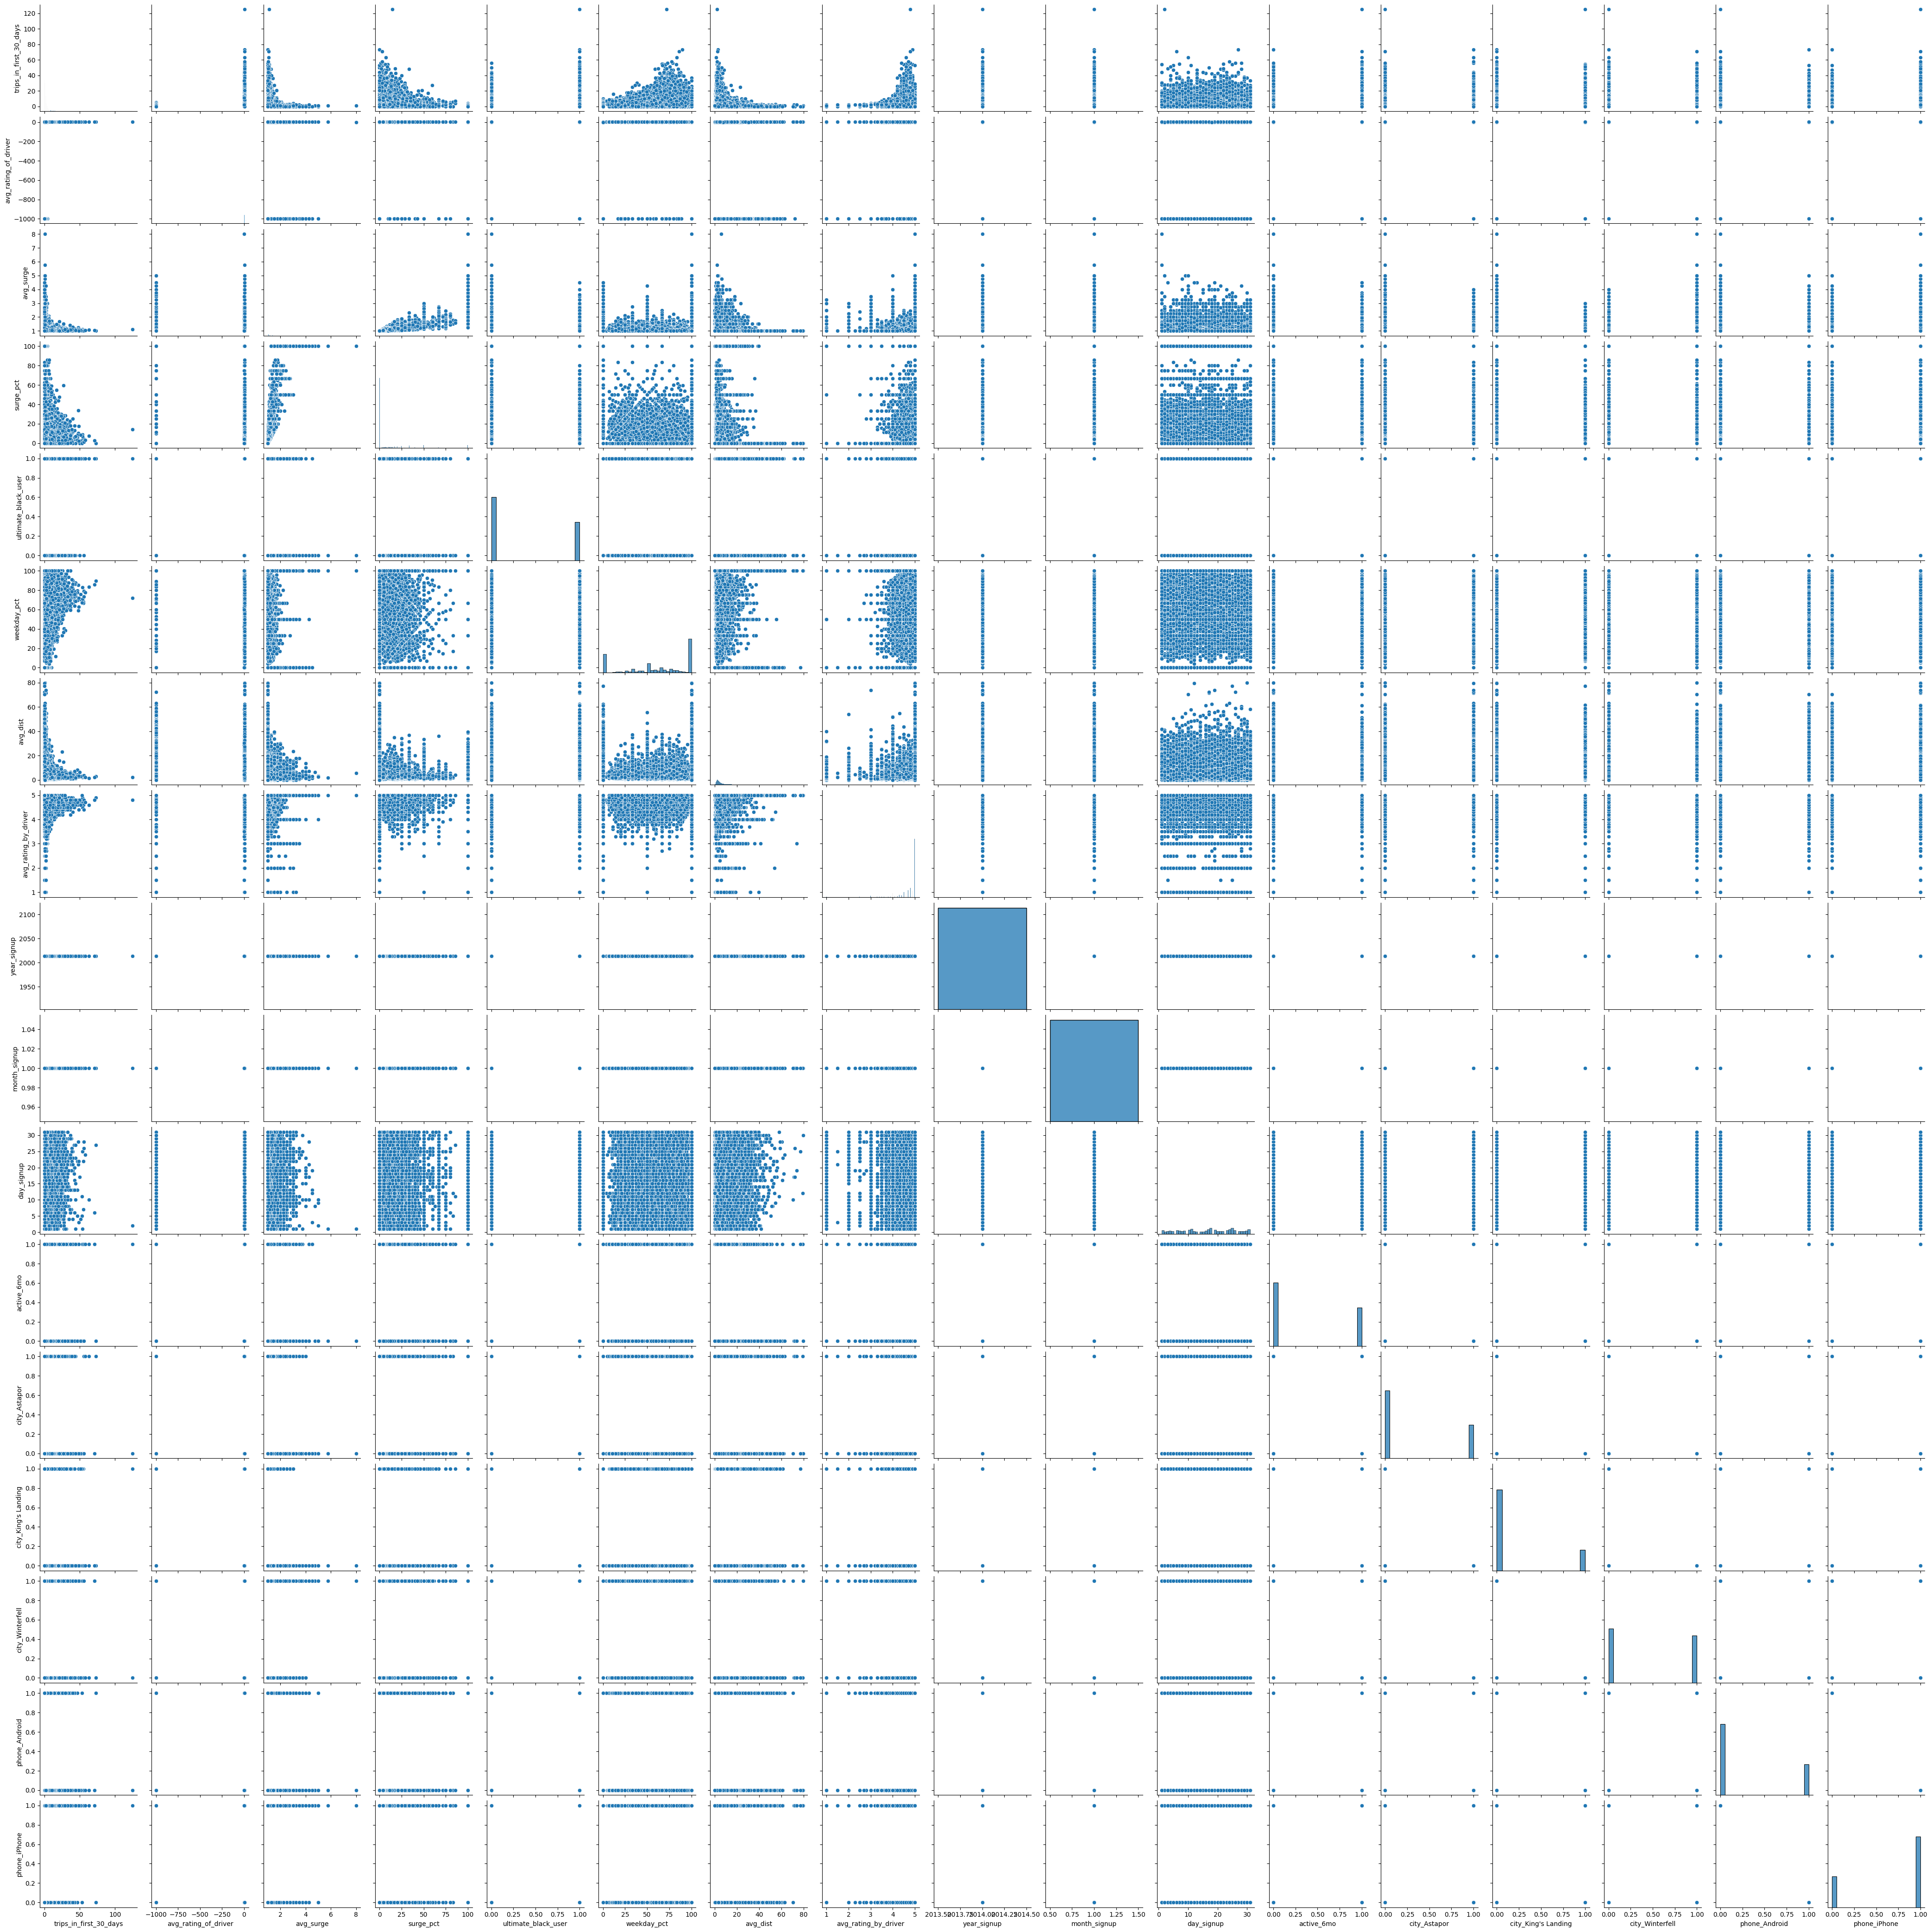

In [24]:
# check for data corelation
sns.pairplot(data_u_num)

# if some version of month_last_trip is the target variable, then possible important features could be: 
# trips_in last 30 days, avg_surge, avg_ratingby_driver

#only one value for year and month signup, so drop
data_u_num.drop(['year_signup', 'month_signup'], axis=1, inplace=True)

<Axes: >

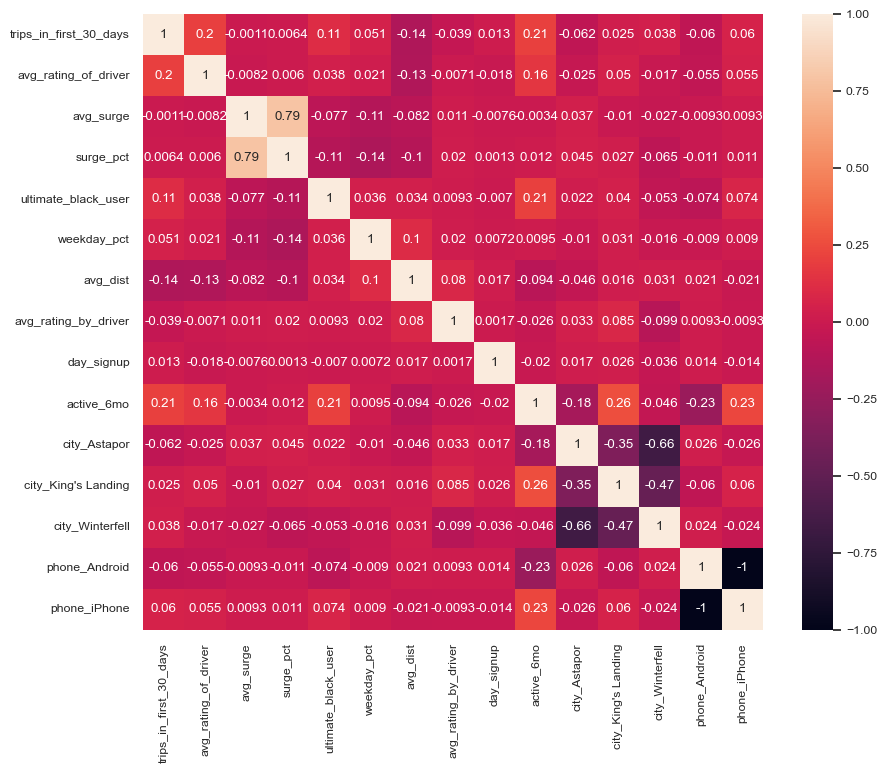

In [25]:
# check for feature correlation
sns.set(font_scale=0.8) 
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(data_u_num.corr(), ax=ax, annot=True)

# pretty low correlations, except the dummy variables for city and phone, and surge_pct and avg_surge
# medium correlations with active 6mo are for ultimate black user, phone type, city, and trips in last 30 days

### Modeling

To precisely answer the question, I will develop a categorical model evaluating whether a user was active less than 6 months or longer than 6 months. 

Note to KP: Which categorical model?? RFC? Other? 

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn .metrics import roc_auc_score
from sklearn.inspection import permutation_importance


In [27]:
# split data into test/train
X = data_u_num.drop('active_6mo', axis=1)
y = data_u_num['active_6mo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

#verify that test and train have same split as data
print('test counts:', y_test.value_counts() / len(y_test))
print('train counts:', y_train.value_counts() / len(y_train))

test counts: active_6mo
0    0.622521
1    0.377479
Name: count, dtype: float64
train counts: active_6mo
0    0.622947
1    0.377053
Name: count, dtype: float64


In [28]:
# first Random Forest Classifier model

crf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=777)
crf.fit(X_train, y_train)
y_pred = crf.predict(X_test)

print('train accuracy score:', accuracy_score(y_test, y_pred))

# accuracy decent. Can we improve with different parameters?

train accuracy score: 0.7297935501281878


In [29]:
# CV Grid Search for hyperparameter tuning
param_grid = {
    'random_state': [777],
    'max_depth': [2, 10, 20],
    'n_estimators': [100, 200, 300], 
    'class_weight': ['balanced', 'balaced_subsample', 'None'] #test this parameter since categories are uneven
}

grid_search = GridSearchCV(estimator=crf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
grid_search.best_params_
# note not all models converge to solution
# best model 

/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
54 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_pa

{'class_weight': 'balanced',
 'max_depth': 10,
 'n_estimators': 200,
 'random_state': 777}

In [30]:
##best parameters

crf = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=777, class_weight='balanced')
crf.fit(X_train, y_train)
y_pred = crf.predict(X_test)

print('train accuracy score:', accuracy_score(y_test, y_pred))
# increase of accuracy by 6%

train accuracy score: 0.7763459722034813


<Axes: >

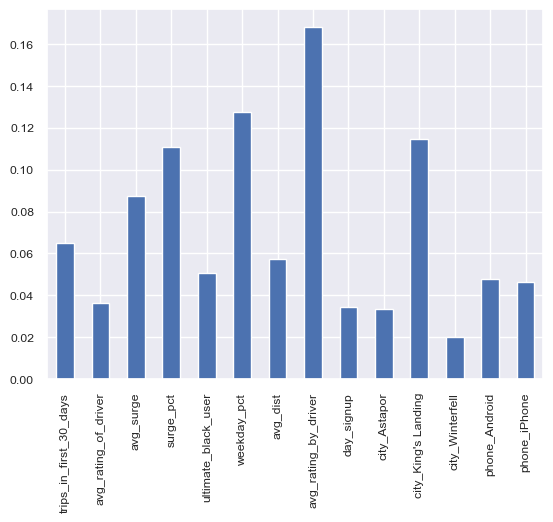

In [31]:
#next, we'll take a look at feature importance
importances = crf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
### lets remove signup date columns, winterfell, and iphone
# also, since sur_pct and avg_surge are highly correlated, let's remove avg_surge since it has lower importance

train accuracy score: 0.7741870192956416


<Axes: >

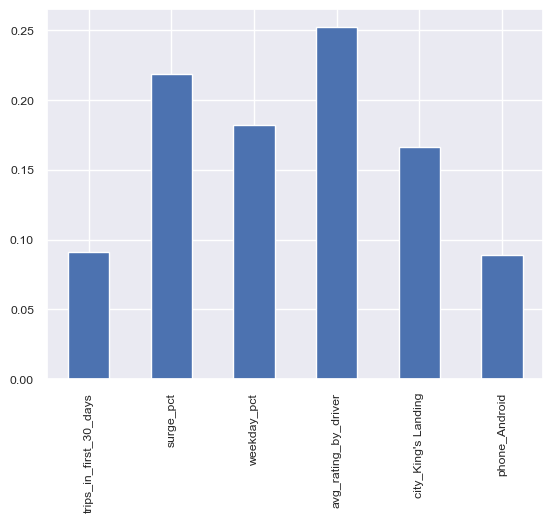

In [32]:
# rerun model but with fewer features
#after running a couple of times, I also removed more metrics iteratively until accuracy started to fall

cols_to_drop = ['day_signup', 'city_Winterfell', 'phone_iPhone', 'avg_surge', 
                 'city_Astapor', 'avg_rating_of_driver', 'ultimate_black_user', 'avg_dist']
                
data_fewer_feat = data_u_num.drop(cols_to_drop, axis=1)
X_fewer_feat = data_fewer_feat.drop('active_6mo', axis=1)
y_fewer_feat = data_fewer_feat['active_6mo']

# split data into test/train
X_train_fewer_feat, X_test_fewer_feat, y_train_fewer_feat, y_test_fewer_feat = train_test_split(X_fewer_feat, y_fewer_feat, test_size=0.3, random_state=777)
 
#fit model
crf_less_feat = RandomForestClassifier(max_depth=10, n_estimators=150, random_state=777)
crf_less_feat.fit(X_train_fewer_feat, y_train_fewer_feat)
y_pred_fewer_feat = crf_less_feat.predict(X_test_fewer_feat)
print('train accuracy score:', accuracy_score(y_test_fewer_feat, y_pred_fewer_feat))

#plot importance
importances = crf_less_feat.feature_importances_
forest_importances = pd.Series(importances, index=X_train_fewer_feat.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)


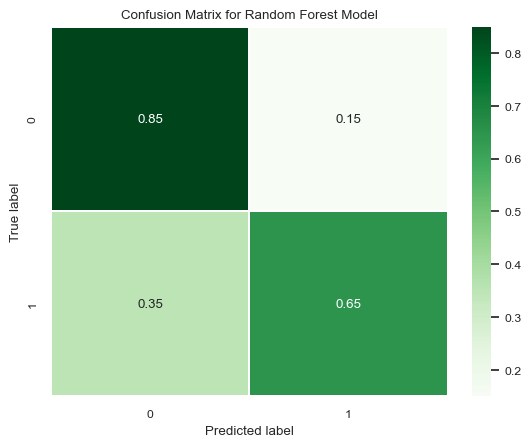

In [33]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_fewer_feat, y_pred_fewer_feat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] ## percent of true/false positives/negatives

# Build the plot
sns.heatmap(matrix, annot=True, 
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# False positives occur 17% of the time, false negatives 30% - not great for real business use case, but perhaps a place to start. 

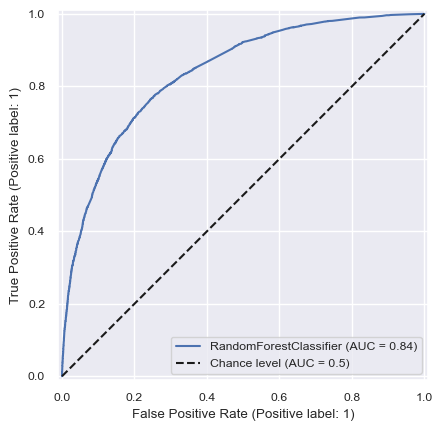

ROC Score: 0.7496134000024987


In [34]:
crf_less_feat_roc = RocCurveDisplay.from_estimator(crf_less_feat, X_test_fewer_feat, y_test_fewer_feat)
plt.plot((0, 1), color='k', linestyle='--', label='Chance level (AUC = 0.5)')
plt.legend()
plt.show()

print('ROC Score:', roc_auc_score(y_test_fewer_feat, y_pred_fewer_feat))

active_6mo  city_King's Landing
0           0                      0.547403
1           0                      0.249646
            1                      0.127535
0           1                      0.075416
Name: count, dtype: float64
active_6mo  phone_Android
0           0                0.383557
1           0                0.313646
0           1                0.239262
1           1                0.063535
Name: count, dtype: float64


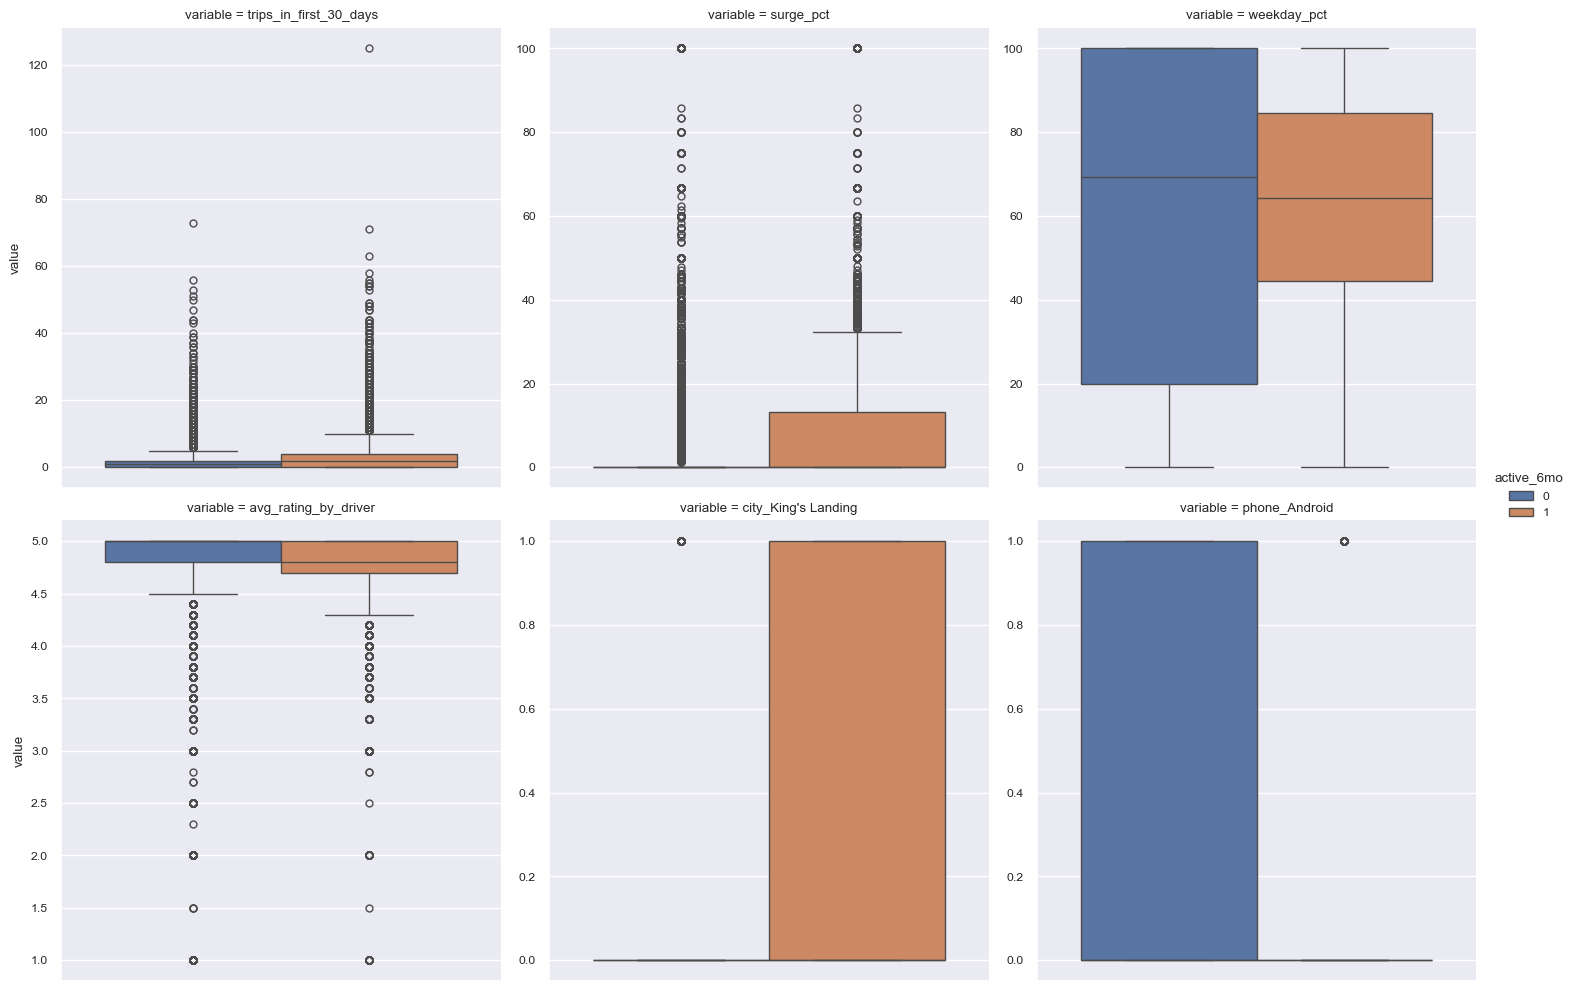

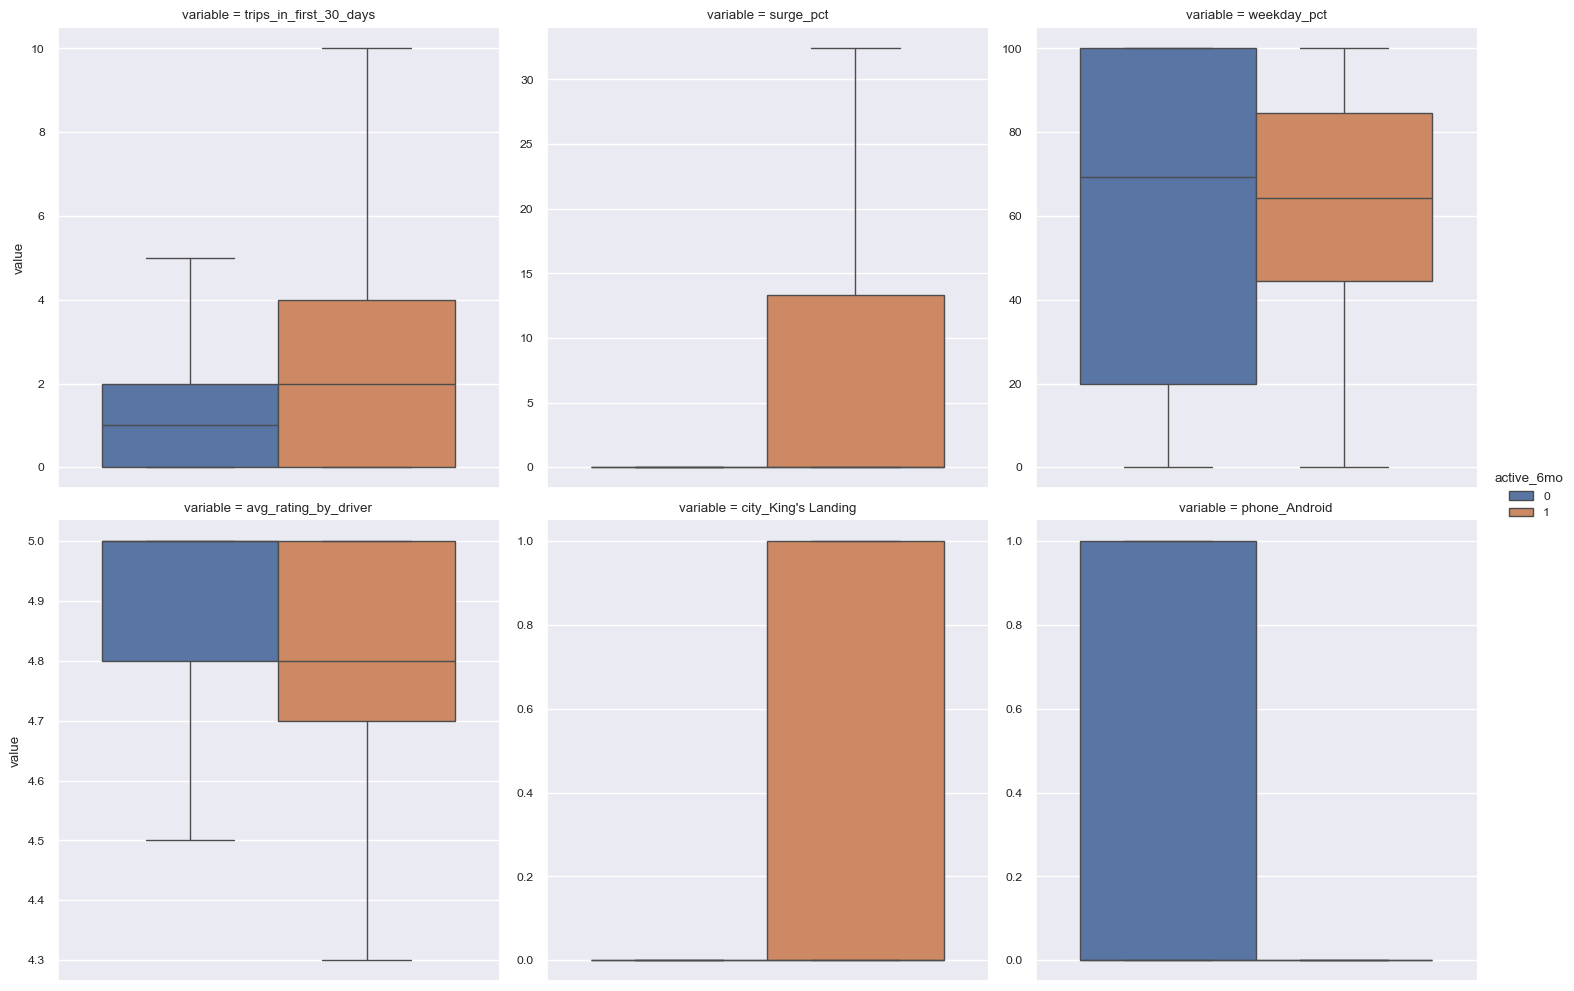

In [35]:
# sns.catplot(data=data_fewer_feat, hue='active_6mo', kind='box', y='weekday_pct')

# data_fewer_feat.pivot(columns='active_6mo', index=).head(20)
data_fewer_feat.columns
# data_fewer_feat.stack(level=['trips_in_first_30_days', 'surge_pct', 'weekday_pct',
#                              'avg_rating_by_driver', "city_King's Landing", 'phone_Android']).head(20)
# data_fewer_feat.pivot_table(values=['trips_in_first_30_days', 'surge_pct', 'weekday_pct',
#                              'avg_rating_by_driver', "city_King's Landing", 'phone_Android'], 
#                             index='active_6mo').head()

sns.catplot(data=data_fewer_feat.melt(id_vars='active_6mo'), kind='box', y='value', hue='active_6mo', col_wrap=3, col='variable', 
           sharey=False)

sns.catplot(data=data_fewer_feat.melt(id_vars='active_6mo'), kind='box', y='value', hue='active_6mo', col='variable', col_wrap=3, showfliers=False, 
           sharey=False)

print(data_fewer_feat[['active_6mo', "city_King's Landing"]].value_counts() / len(data_fewer_feat))
print(data_fewer_feat[['active_6mo', 'phone_Android']].value_counts() / len(data_fewer_feat))



### LOGISTIC REGRESSION
Random Forest Classifier model doesn't have great accuracy. Would Logistic Regression permorm better? 


In [36]:
# let's try logistic regression to see if the model performs better
X = data_u_num.drop('active_6mo', axis=1)
y = data_u_num['active_6mo']

# split data into test/train
lr = LogisticRegression(C=2, max_iter=500, random_state=777) # high max iter to get model to converge
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('train accuracy score:', accuracy_score(y_test, y_pred))


train accuracy score: 0.7248009715288085


/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#perform CV Grid Search - can we improve performance?
param_grid = {
    'random_state': [777],
    'C': [1, 2, 0.5, 0.25],
    'penalty': ['l2', 'l1'], 
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [300, 500, 1000]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
grid_search.best_params_
# turns out our best parameters use liblinear solver, l1 penalty, and 300 iter

/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kealiepretzlav/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

{'C': 1,
 'max_iter': 1000,
 'penalty': 'l2',
 'random_state': 777,
 'solver': 'lbfgs'}

In [38]:
# best hyperparameters, accuracy not really much better
lr = LogisticRegression(C=0.25, solver='liblinear', max_iter=300, penalty='l1', random_state=777)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
y_pred = lr.predict(X_test)

print('train accuracy score:', accuracy_score(y_test, y_pred))
# same accuracy

0.7221258385380522
train accuracy score: 0.7248684388071786


In [39]:
#try with same reduced number of variables as Random Forest Classifier
lr = LogisticRegression(C=0.25, solver='liblinear', max_iter=300, penalty='l1', random_state=777)
lr.fit(X_train_fewer_feat, y_train_fewer_feat)
print(lr.score(X_train_fewer_feat, y_train_fewer_feat))
y_pred_fewer_feat = lr.predict(X_test_fewer_feat)

print('train accuracy score:', accuracy_score(y_test_fewer_feat, y_pred_fewer_feat))
# same as other Logistic Regression models, so Random Forest Classifier performs better

0.7070321535970391
train accuracy score: 0.7047631898529213


#### Modeling Summary

Random Forest Classifier performs better than Logistic Regression, with an accuracy of approx 78%. Churn (isactive_6mo = 0) is accurately predicted 85% of the time, and retention predicted accurately 65% of the time. (False positives 15% , false negatives 35%). Interestingly, churn is more accurately predicted than retention, which is more helpful for Ultimate Co. 


Prediction of user churn after 6 months is primarily driven by (in order of importance), with some initial observations:
1. avg_rating_by_driver: Interestingly, user rating of a driver was not important for predicting user retention. But, the rating the user received from the driver was important, with higher rated drivers more likely to churn. This could be a difference between weekend evening users (i.e. partiers) and not. To understand this trend, drivers should be surveyed to ask why they would choose to rate user lower than others. 
2. surge_pct: churned users were less willing to pay for surge pricing
3. weekday_pct: churned users had more variable weekday/weekend split, but percent weekday rides higher than retained users
4. city_King’s Landing: Interestingly keeping information about whether a user was in Winterfell or Astapor was not important for model accuracy (at least with the data we have). It’s more important to know whether the city was or was not King’s Landing. Churned users were most likely to be from Astapor or Winterfell than King’s Landing. 
5. phone_Android (1 for Android, 0 for iPhone so captures both phone types): churned users were more likely to use iPhone compared with Android
6. trips_in_first_30_days: retained users generally take more rides in the first 30 days

To improve user retention, promotions should be focused in the first 30 days, or perhaps reduce surge pricing for new users in the first 30 days. Initial promotions could be prioritized in Astapor or Winterfall where more users churned. iPhone users could also benefit from additional promotions rather than Android users. 